Lab -1 : GANs 



In [3]:
%matplotlib inline

#import torch
#from torch import nn

import numpy as np
import matplotlib.pyplot as plt

### 1. Data Generation
We will generate the data from the normal gaussian distribution

In [ ]:
X = torch.normal(0.0, 1, (10000, 2))
A = torch.tensor([1, 2], [0.1, 0.6])
b = torch.tensor([1, 2])
data = torch.matmul(X, A) + b

data

In [ ]:
plt.scatter(data[:100, (0)].detach().numpy(), data[:100, (1)].detach().numpy())
plt.show()

In [ ]:
print("The covariance matrix A^TA is : ", torch.matmul(A.T, A))

In [ ]:
batch_size = 8
data_iter = d2l.load_array()


### Example2

In [4]:
# Get a batch of real data.  Our goal is to make data that looks like this.
def get_real_data_batch(n_sample):
  np.random.seed(0)
  x_true = np.random.normal(size=(1,n_sample)) + 7.5
  return x_true

# generator function
# takes a standard normally-distributed latent variable z and adds \theta a scalar
# model can generate the family of Gaussian distributions with unit variance, but different means
def generator(z, theta):
    x_gen = z + theta
    return x_gen

# building discreminator : logistic regression model 1D linear model which passed through the sigmoid 
# that return s the probability that data is real

# sigmoid function f: [-inf, +inf] to [0, 1]
def sigmoid(data_in):
    return 1.0/ (1.0 + np.exp(-data_in))

# Discriminator computes y
def discriminator(x, phi0, phi1):
  return sigmoid(phi0 + phi1 * x)

In [5]:
# Draws a figure like Figure 15.1a
def draw_data_model(x_real, x_syn, phi0=None, phi1=None):
  fix, ax = plt.subplots();

  for x in x_syn:
    ax.plot([x,x],[0,0.33],color='#f47a60')
  for x in x_real:
    ax.plot([x,x],[0,0.33],color='#7fe7dc')

  if phi0 is not None:
    x_model = np.arange(0,10,0.01)
    y_model = discriminator(x_model, phi0, phi1)
    ax.plot(x_model, y_model,color='#dddddd')
  ax.set_xlim([0,10])
  ax.set_ylim([0,1])


  plt.show()
     

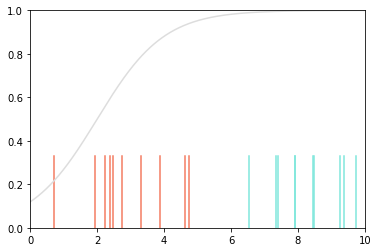

In [6]:
# Get data batch
x_real = get_real_data_batch(10)

# Initialize generator and synthesize a batch of examples
theta = 3.0
np.random.seed(1)
z = np.random.normal(size=(1,10))
x_syn = generator(z, theta)

# Initialize discriminator model
phi0 = -2
phi1 = 1

draw_data_model(x_real, x_syn, phi0, phi1)

In [ ]:
# discriminators loss
def compute_discriminator_loss(x_real, x_syn, phi0, phi1):
    """
    Write the disciminator loss function which computes it's loss
    
    """
    loss = 0.0
    return loss

In [ ]:
# Test the loss
loss = compute_discriminator_loss(x_real, x_syn, phi0, phi1)
print("True Loss = 13.814757170851447, Your loss=", loss )

In [ ]:
# Gradient of loss (cheating, using finite differences)
def compute_discriminator_gradient(x_real, x_syn, phi0, phi1):
  delta = 0.0001;
  loss1 = compute_discriminator_loss(x_real, x_syn, phi0, phi1)
  loss2 = compute_discriminator_loss(x_real, x_syn, phi0+delta, phi1)
  loss3 = compute_discriminator_loss(x_real, x_syn, phi0, phi1+delta)
  dl_dphi0 = (loss2-loss1) / delta
  dl_dphi1 = (loss3-loss1) / delta

  return dl_dphi0, dl_dphi1


In [ ]:
# This routine performs gradient descent with the discriminator
def update_discriminator(x_real, x_syn, n_iter, phi0, phi1):

  # Define learning rate
  alpha = 0.01

  # Get derivatives
  print("Initial discriminator loss = ", compute_discriminator_loss(x_real, x_syn, phi0, phi1))
  for iter in range(n_iter):
    # Get gradient
    dl_dphi0, dl_dphi1 = compute_discriminator_gradient(x_real, x_syn, phi0, phi1)
    # Take a gradient step downhill
    phi0 = phi0 - alpha * dl_dphi0 ;
    phi1 = phi1 - alpha * dl_dphi1 ;

  print("Final Discriminator Loss= ", compute_discriminator_loss(x_real, x_syn, phi0, phi1))

  return phi0, phi1

In [ ]:

# Let's update the discriminator (sigmoid curve)
n_iter = 100
print("Initial parameters (phi0,phi1)", phi0, phi1)
phi0, phi1 = update_discriminator(x_real, x_syn, n_iter, phi0, phi1)
print("Final parameters (phi0,phi1)", phi0, phi1)
draw_data_model(x_real, x_syn, phi0, phi1)
     

In [ ]:
# 
def compute_generator_loss(z, theta, phi0, phi1):
  # TODO -- Run the generator on the latent variables z with the parameters theta
  # to generate new data x_syn
  # Then run the discriminator on the new data to get the probability of being real
  # The loss is the total negative log probability of being synthesized (i.e. of not being real)
  # Replace this code
  loss = 1


  return loss

In [ ]:
# Test generator loss to check you have it correct
loss = compute_generator_loss(z, theta, -2, 1)
print("True Loss = 13.78437035945412, Your loss=", loss )

In [ ]:
def compute_generator_gradient(z, theta, phi0, phi1):
  delta = 0.0001
  loss1 = compute_generator_loss(z,theta, phi0, phi1) ;
  loss2 = compute_generator_loss(z,theta+delta, phi0, phi1) ;
  dl_dtheta = (loss2-loss1)/ delta
  return dl_dtheta

In [ ]:
def update_generator(z, theta, n_iter, phi0, phi1):
    # Define learning rate
    alpha = 0.02

    # Get derivatives
    print("Initial generator loss = ", compute_generator_loss(z, theta, phi0, phi1))
    for iter in range(n_iter):
      # Get gradient
      dl_dtheta = compute_generator_gradient(z, theta, phi0, phi1)
      # Take a gradient step (uphill, since we are trying to make synthesized data less well classified by discriminator)
      theta = theta + alpha * dl_dtheta ;

    print("Final generator loss = ", compute_generator_loss(z, theta, phi0, phi1))
    return theta


In [ ]:
n_iter = 10
theta = 3.0
print("Theta before", theta)
theta = update_generator(z, theta, n_iter, phi0, phi1)
print("Theta after", theta)

x_syn = generator(z,theta)
draw_data_model(x_real, x_syn, phi0, phi1)
     

In [ ]:
# Now let's define a full GAN loop

# Initialize the parameters
theta = 3
phi0 = -2
phi1 = 1

# Number of iterations for updating generator and discriminator
n_iter_discrim = 300
n_iter_gen = 3

print("Final parameters (phi0,phi1)", phi0, phi1)
for c_gan_iter in range(5):

  # Run generator to product synthesized data
  x_syn = generator(z, theta)
  draw_data_model(x_real, x_syn, phi0, phi1)

  # Update the discriminator
  print("Updating discriminator")
  phi0, phi1 = update_discriminator(x_real, x_syn, n_iter_discrim, phi0, phi1)
  draw_data_model(x_real, x_syn, phi0, phi1)

  # Update the generator
  print("Updating generator")
  theta = update_generator(z, theta, n_iter_gen, phi0, phi1)

### r

In [7]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap
from scipy.optimize import linprog

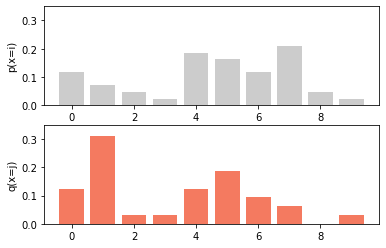

In [8]:
# Define two probability distributions
p = np.array([5, 3, 2, 1, 8, 7, 5, 9, 2, 1])
q = np.array([4, 10,1, 1, 4, 6, 3, 2, 0, 1])
p = p/np.sum(p);
q=  q/np.sum(q);

# Draw those distributions
fig, ax =plt.subplots(2,1);
x = np.arange(0,p.size,1)
ax[0].bar(x,p, color="#cccccc")
ax[0].set_ylim([0,0.35])
ax[0].set_ylabel("p(x=i)")

ax[1].bar(x,q,color="#f47a60")
ax[1].set_ylim([0,0.35])
ax[1].set_ylabel("q(x=j)")
plt.show()

In [ ]:
# TODO Define the distance matrix from figure 15.8d
# Replace this line
dist_mat = np.zeros((10,10))

# vectorize the distance matrix
c = dist_mat.flatten()
     

# Define pretty colormap
my_colormap_vals_hex =('2a0902', '2b0a03', '2c0b04', '2d0c05', '2e0c06', '2f0d07', '300d08', '310e09', '320f0a', '330f0b', '34100b', '35110c', '36110d', '37120e', '38120f', '39130f', '3a1410', '3b1411', '3c1511', '3d1612', '3e1613', '3f1713', '401714', '411814', '421915', '431915', '451a16', '461b16', '471b17', '481c17', '491d18', '4a1d18', '4b1e19', '4c1f19', '4d1f1a', '4e201b', '50211b', '51211c', '52221c', '53231d', '54231d', '55241e', '56251e', '57261f', '58261f', '592720', '5b2821', '5c2821', '5d2922', '5e2a22', '5f2b23', '602b23', '612c24', '622d25', '632e25', '652e26', '662f26', '673027', '683027', '693128', '6a3229', '6b3329', '6c342a', '6d342a', '6f352b', '70362c', '71372c', '72372d', '73382e', '74392e', '753a2f', '763a2f', '773b30', '783c31', '7a3d31', '7b3e32', '7c3e33', '7d3f33', '7e4034', '7f4134', '804235', '814236', '824336', '834437', '854538', '864638', '874739', '88473a', '89483a', '8a493b', '8b4a3c', '8c4b3c', '8d4c3d', '8e4c3e', '8f4d3f', '904e3f', '924f40', '935041', '945141', '955242', '965343', '975343', '985444', '995545', '9a5646', '9b5746', '9c5847', '9d5948', '9e5a49', '9f5a49', 'a05b4a', 'a15c4b', 'a35d4b', 'a45e4c', 'a55f4d', 'a6604e', 'a7614e', 'a8624f', 'a96350', 'aa6451', 'ab6552', 'ac6552', 'ad6653', 'ae6754', 'af6855', 'b06955', 'b16a56', 'b26b57', 'b36c58', 'b46d59', 'b56e59', 'b66f5a', 'b7705b', 'b8715c', 'b9725d', 'ba735d', 'bb745e', 'bc755f', 'bd7660', 'be7761', 'bf7862', 'c07962', 'c17a63', 'c27b64', 'c27c65', 'c37d66', 'c47e67', 'c57f68', 'c68068', 'c78169', 'c8826a', 'c9836b', 'ca846c', 'cb856d', 'cc866e', 'cd876f', 'ce886f', 'ce8970', 'cf8a71', 'd08b72', 'd18c73', 'd28d74', 'd38e75', 'd48f76', 'd59077', 'd59178', 'd69279', 'd7937a', 'd8957b', 'd9967b', 'da977c', 'da987d', 'db997e', 'dc9a7f', 'dd9b80', 'de9c81', 'de9d82', 'df9e83', 'e09f84', 'e1a185', 'e2a286', 'e2a387', 'e3a488', 'e4a589', 'e5a68a', 'e5a78b', 'e6a88c', 'e7aa8d', 'e7ab8e', 'e8ac8f', 'e9ad90', 'eaae91', 'eaaf92', 'ebb093', 'ecb295', 'ecb396', 'edb497', 'eeb598', 'eeb699', 'efb79a', 'efb99b', 'f0ba9c', 'f1bb9d', 'f1bc9e', 'f2bd9f', 'f2bfa1', 'f3c0a2', 'f3c1a3', 'f4c2a4', 'f5c3a5', 'f5c5a6', 'f6c6a7', 'f6c7a8', 'f7c8aa', 'f7c9ab', 'f8cbac', 'f8ccad', 'f8cdae', 'f9ceb0', 'f9d0b1', 'fad1b2', 'fad2b3', 'fbd3b4', 'fbd5b6', 'fbd6b7', 'fcd7b8', 'fcd8b9', 'fcdaba', 'fddbbc', 'fddcbd', 'fddebe', 'fddfbf', 'fee0c1', 'fee1c2', 'fee3c3', 'fee4c5', 'ffe5c6', 'ffe7c7', 'ffe8c9', 'ffe9ca', 'ffebcb', 'ffeccd', 'ffedce', 'ffefcf', 'fff0d1', 'fff2d2', 'fff3d3', 'fff4d5', 'fff6d6', 'fff7d8', 'fff8d9', 'fffada', 'fffbdc', 'fffcdd', 'fffedf', 'ffffe0')
my_colormap_vals_dec = np.array([int(element,base=16) for element in my_colormap_vals_hex])
r = np.floor(my_colormap_vals_dec/(256*256))
g = np.floor((my_colormap_vals_dec - r *256 *256)/256)
b = np.floor(my_colormap_vals_dec - r * 256 *256 - g * 256)
my_colormap = ListedColormap(np.vstack((r,g,b)).transpose()/255.0)

def draw_2D_heatmap(data, title, my_colormap):
  # Make grid of intercept/slope values to plot
  xv, yv = np.meshgrid(np.linspace(0, 1, 10), np.linspace(0, 1, 10))
  fig,ax = plt.subplots()
  fig.set_size_inches(4,4)
  plt.imshow(data, cmap=my_colormap)
  ax.set_title(title)
  ax.set_xlabel('q')
  ax.set_ylabel('p')
  plt.show()

In [ ]:
draw_2D_heatmap(dist_mat,r'Distance |i-j|', my_colormap)

In [ ]:
# Define b to be the verticalconcatenation of p and q
b = np.hstack((p,q))[np.newaxis].transpose()
     

# TODO:  Now construct the matrix A that has the initial distribution constraints
# so that A @ TPFlat=b where TPFlat is the transport plan TP vectorized rows first so TPFlat = np.flatten(TP)
# Replace this line:
A = np.zeros((20,100))

In [ ]:
# We don't need the constraint that p>0 as this is the default
opt = linprog(c, A_eq=A, b_eq=b)
print(opt)
     

In [ ]:
# extract the answer and display
TP = np.array(opt.x).reshape(10,10)
draw_2D_heatmap(TP,r'Transport plan P', my_colormap)

In [ ]:
# compute the wasserstein distance
was = np.sum(TP * dist_mat)
print("Your Wasserstein distance = ", was)
print("Correct answer =  0.15148578811369506")

In [ ]:
"""  
Compute the 
1. Forward KL divergence $D_{KL}[p, q]$ between these distribution
2. Reverse KL divergence $D_{KL}[q, p]$ between these distribution
3. Jensen-Shannon divergence $D_{JS} [p, q]$ between these distribution

"""